## **Notebook EC#07 - Part 2**
## Autoencoder training and manifold visualization for the MNIST database.
## Code produced by previous students of IA353. Thank you for making EC#07 (Part 2) still more complete and informative.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Túlio Queiroz de Paula

### Loading the main libraries

In [66]:
import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input, Conv2DTranspose, Reshape
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

### Reading the data

In [67]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [68]:
x_train, x_test = x_train / 255.0, x_test / 255.
X = x_train.reshape((x_train.shape[0], -1))

### Convolutional Autoencoder

The dense layers of Part 1 were replaced by convolutional layers, which promotes a reduction in the total number of adjustable weights.

In [69]:
encoder = tf.keras.models.Sequential([
    Conv2D(8, (3, 3), activation='selu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(256, (3, 3), activation='selu', padding='same'),
    Flatten(),
    Dense(2),

], name='encoder')

# Define the decoder
decoder = tf.keras.models.Sequential([
    Dense(256, activation='relu'),
    Reshape((1, 1, 256)),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2D(8, (3, 3), padding='same', activation='selu'),
    Conv2D(1, (3, 3), padding='same', activation=None),
], name='decoder')

autoencoder = Sequential([encoder, decoder])
autoencoder.summary(expand_nested=True)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Sequential)            │ (None, 2)              │       393,922 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_40 (Conv2D)         │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ max_pooling2d_25           │ (None, 14, 14, 8)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_41 (Conv2D)         │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ max_pooling2d_26           │ (None, 7, 7, 16)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_42 (Conv2D)         │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ max_pooling2d_27           │ (None, 4, 4, 32)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_43 (Conv2D)         │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ max_pooling2d_28           │ (None, 2, 2, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_44 (Conv2D)         │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ max_pooling2d_29           │ (None, 1, 1, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_45 (Conv2D)         │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ flatten_5 (Flatten)        │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ dense_12 (Dense)           │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Sequential)            │ (None, 28, 28, 1)      │       393,921 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ dense_13 (Dense)           │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ reshape_5 (Reshape)        │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_transpose_20        │ (None, 3, 3, 128)      │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_transpose_21        │ (None, 7, 7, 64)       │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_transpose_22        │ (None, 14, 14, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_transpose_23        │ (None, 28, 28, 16)     │         4,62

 Total params: 787,843 (3.01 MB)

 Trainable params: 787,843 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
autoencoder.compile(optimizer = "adam", loss = "mse")

history = autoencoder.fit(x_train.reshape((-1, 28, 28, 1)), x_train.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

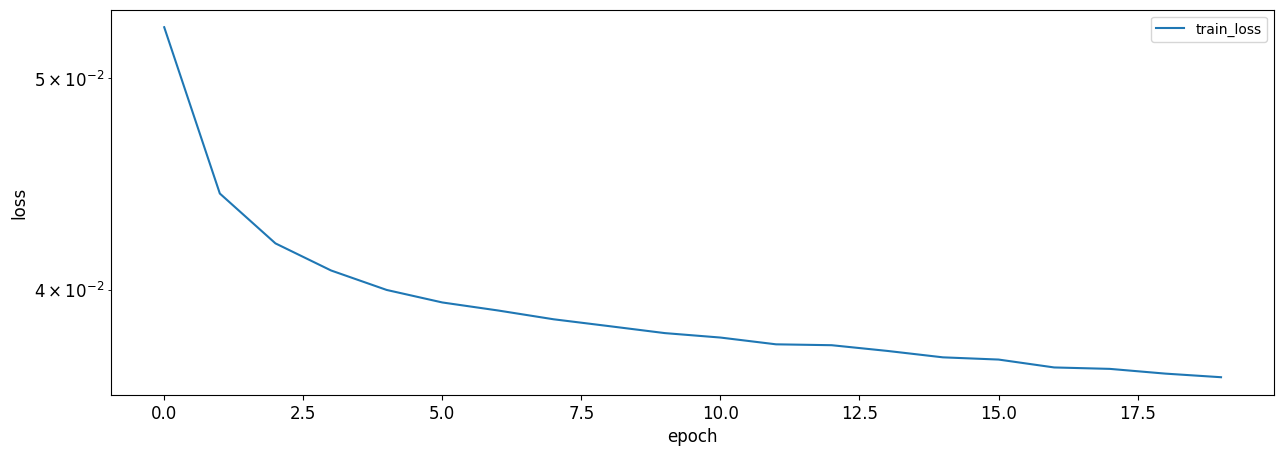

In [71]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

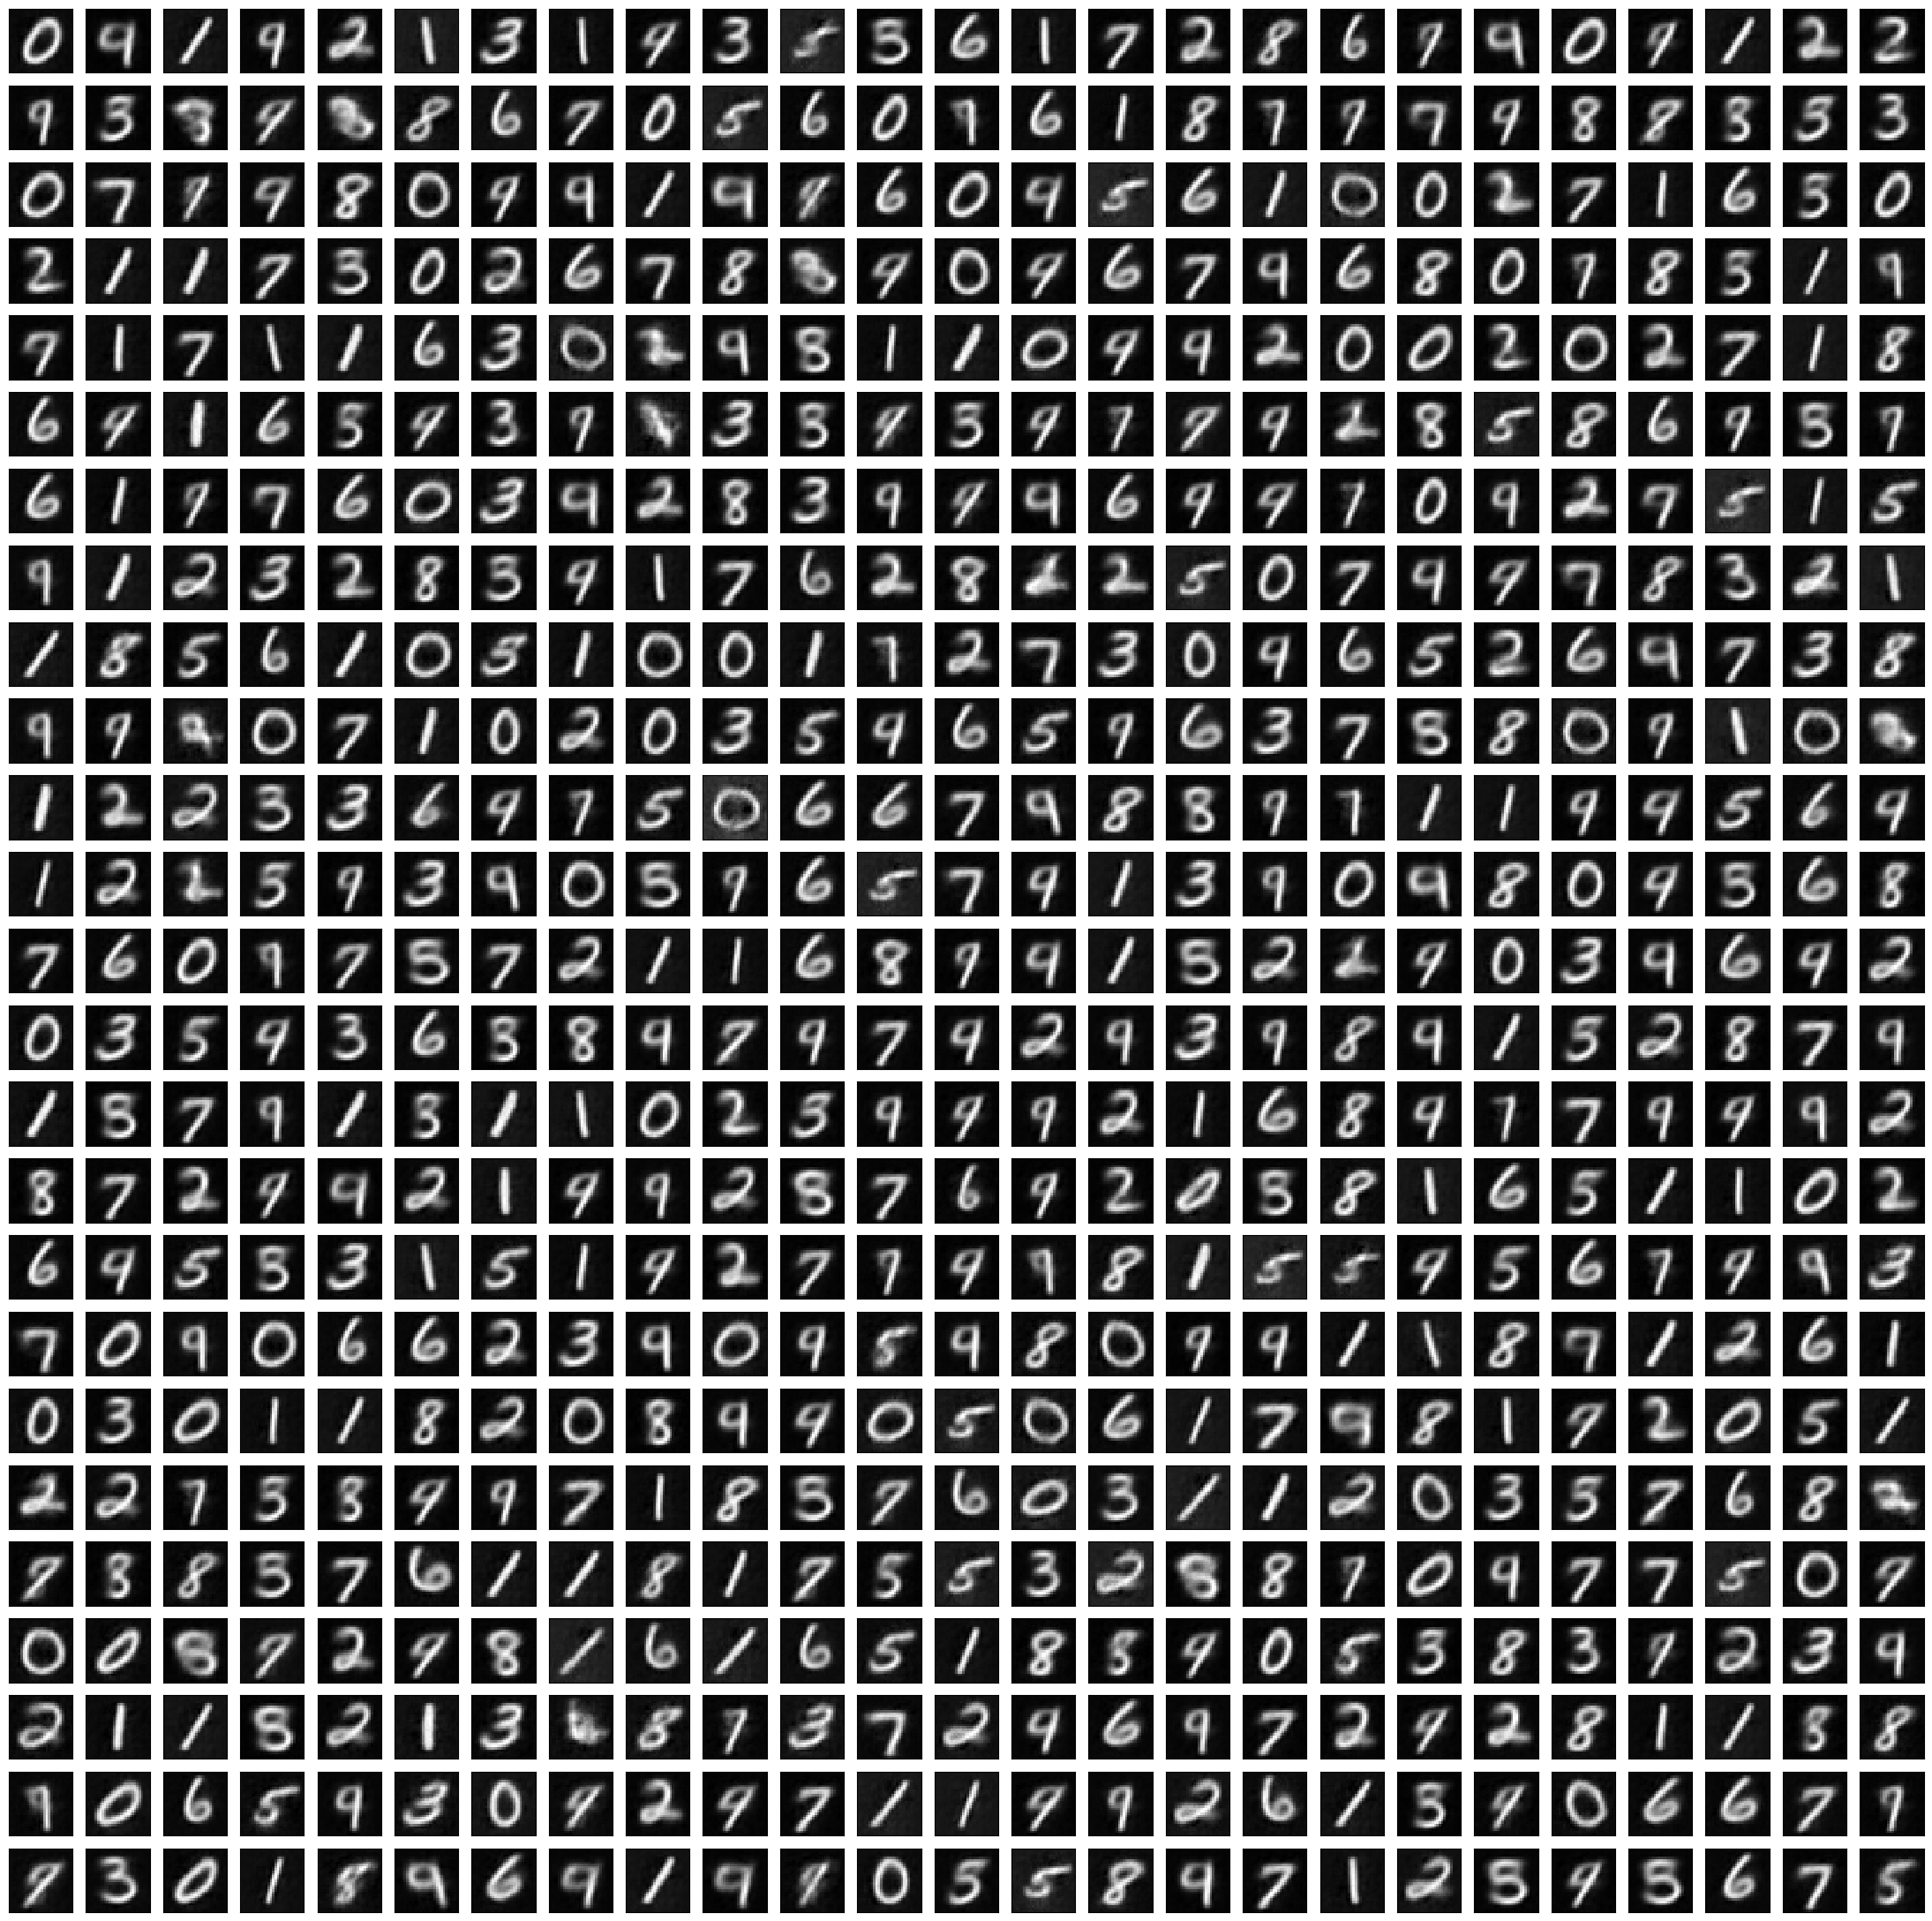

In [72]:
fig = plt.figure(figsize=(28,28))

decoded_images = autoencoder.predict(X[:26*26].reshape((-1, 28, 28, 1)), verbose=False)

ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind)
        plt.imshow(decoded_images[ind].reshape((28,28)), cmap = "gray", interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1

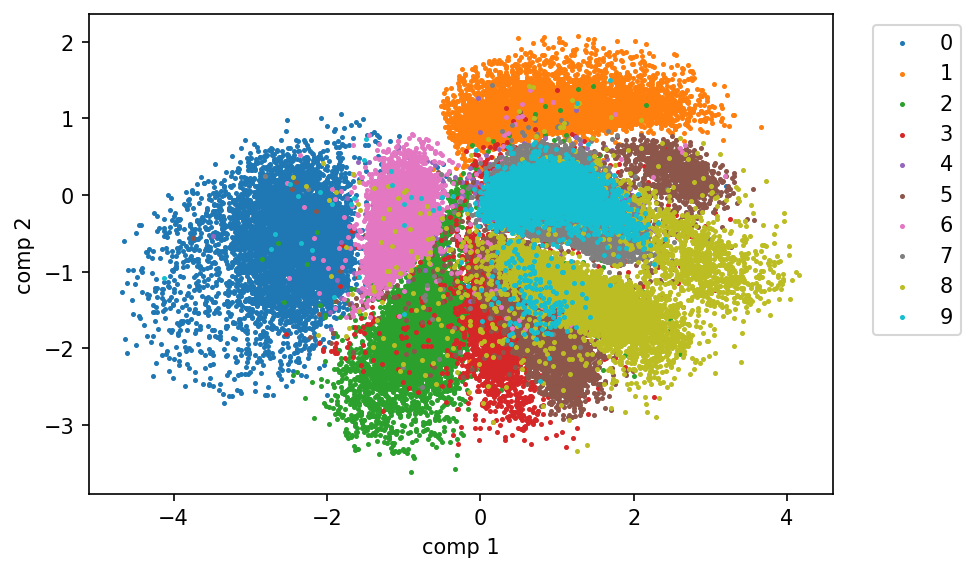

In [73]:
fig, ax = plt.subplots(dpi=150)

x_proj = encoder.predict(X.reshape((-1, 28, 28, 1)), verbose=0)

for i in range(10):
    ax.scatter(*x_proj[y_train == i].T, label=i, s=2)


ax.legend(bbox_to_anchor=(1.04, 1))
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_aspect('equal', 'box')

plt.show()

<font color="green">
Atividade (a) <br>
Compare a disposição dos códigos de dígitos das 10 classes com aquela da Parte 1. Procure justificar a diferença nos resultados.
</font>

**Resposta:**<br>
A separação aqui apresentada é significativamente melhor. O uso de convolução traz benefícios ao utilizar dados com estrutura espacial, pois os kernels que varrem a imagem, parte por parte, podem capturar características locais com maior facilidade, além de construirem uma espécie de estrutura hierárquica de características relevantes ao serem propagadas através desses filtros e preservadas nos dados de dimensão reduzida ao longo do processo. As camadas densas utilizadas na primeira parte não realizam essa varredura minuciosa dos dados, tratam-nos simplesmente como um vetor de entrada, uma lista "plana", sem levar em consideração essa possibilidade dos dados apresentarem atributos espaciais (no caso, imagens). Fica evidente a dificuldade do modelo composto por camadas densas teve maior dificuldade para capturar as características importantes dos dados apenas observando que são necessárias quase 50 épocas para atingir o mesmo loss aqui obtido com 17 épocas.

In [74]:
def circle_path(radius, center, n_images, ax, *args, **kwargs):
    x0, y0 = center

    pts = np.zeros((n_images, 2))
    pts[:, 0] = radius * np.cos(2 * np.pi * np.linspace(1, n_images, num=n_images)/n_images) + x0
    pts[:, 1] = radius * np.sin(2 * np.pi * np.linspace(1, n_images, num=n_images)/n_images) + y0

    path = decoder.predict(pts, verbose=0).reshape((-1, 28, 28))

    for i in range(n_images):
        ax.add_artist(AnnotationBbox(OffsetImage(path[i], cmap='binary_r', zoom=0.4), pts[i], frameon=False))

In [75]:
def clear_artists(ax):
    for artist in ax.artists:
        artist.remove()

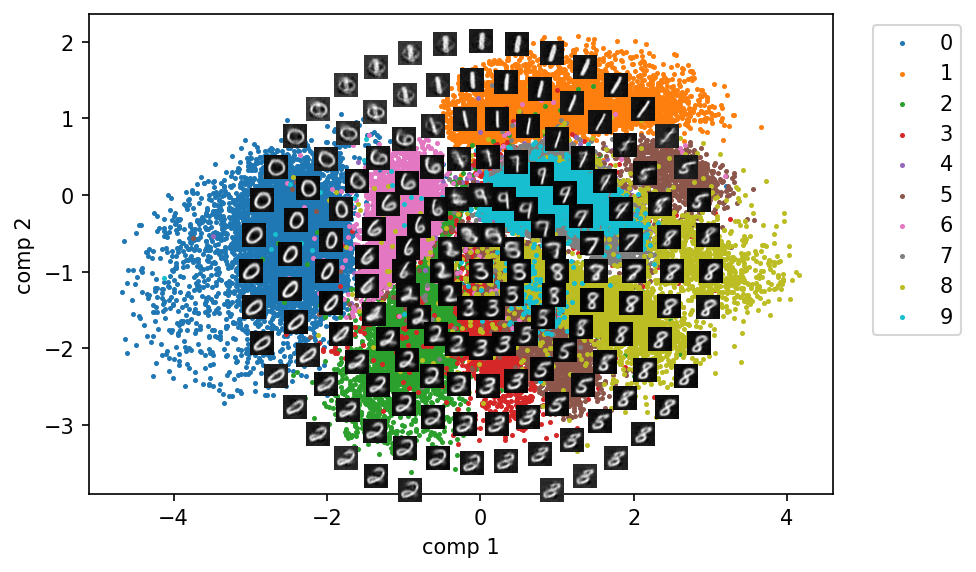

In [76]:
clear_artists(ax)

circle_path(radius=3, center=(0, -1), n_images=40, ax=ax)
circle_path(radius=2.5, center=(0, -1), n_images=35, ax=ax)
circle_path(radius=2, center=(0, -1), n_images=30, ax=ax)
circle_path(radius=1.5, center=(0, -1), n_images=25, ax=ax)
circle_path(radius=1, center=(0, -1), n_images=20, ax=ax)
circle_path(radius=0.5, center=(0, -1), n_images=10, ax=ax)
circle_path(radius=0, center=(0, -1), n_images=1, ax=ax)

fig

<font color="green">
Atividade (b) <br>
Se necessário, redefina os valores de [center], [radius] e [n_images] para que as amostras excursionem por toda a distribuição de códigos. Em outras palavras, não deixe nenhuma região colorida sem amostras.
</font>

### Pre-trained convolutional autoencoder

The idea here is to force the encoder to separate the data before the decoder tries to decode the latent space. To do this, we will pre-train the encoder as a classifier, in a supervised manner. After this encoder pre-training, we will pre-train the decoder to decode in this latent space learned by the classifier, freezing the encoder weights. The decoder will present low performance in this pre-training stage, given that the encoder is not flexible. Finally, to improve overall performance, we will fine-tune the entire autoencoder.

In [77]:
encoder = tf.keras.models.Sequential([
    Conv2D(8, (3, 3), activation='selu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(256, (3, 3), activation='selu', padding='same'),
    Flatten(),
    Dense(2),

], name='encoder')

# Define the decoder
decoder = tf.keras.models.Sequential([
    Dense(256, activation='relu', input_shape=(2,)),
    Reshape((1, 1, 256)),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2D(8, (3, 3), padding='same', activation='selu'),
    Conv2D(1, (3, 3), padding='same', activation=None),
], name='decoder')

In [78]:
pre_train_encoder = Sequential([encoder, Dense(10, 'softmax')])

pre_train_encoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

history = pre_train_encoder.fit(X.reshape((-1, 28, 28, 1)), y_train, batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [79]:
pre_train_decoder = Sequential([decoder])

x_proj = encoder.predict(X.reshape((-1, 28, 28, 1)), verbose=0)

pre_train_decoder.compile(optimizer='adam', loss='mse')

history = pre_train_decoder.fit(x_proj, X.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [80]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer = Adam(learning_rate=1e-10), loss='mse')

history = autoencoder.fit(X.reshape((-1, 28, 28, 1)), X.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 50, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

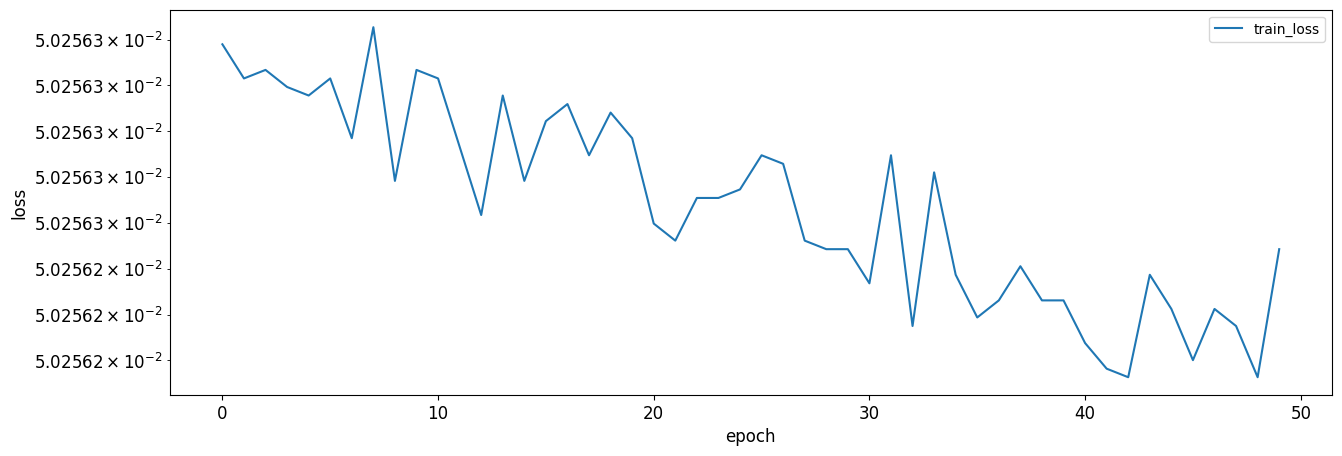

In [81]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

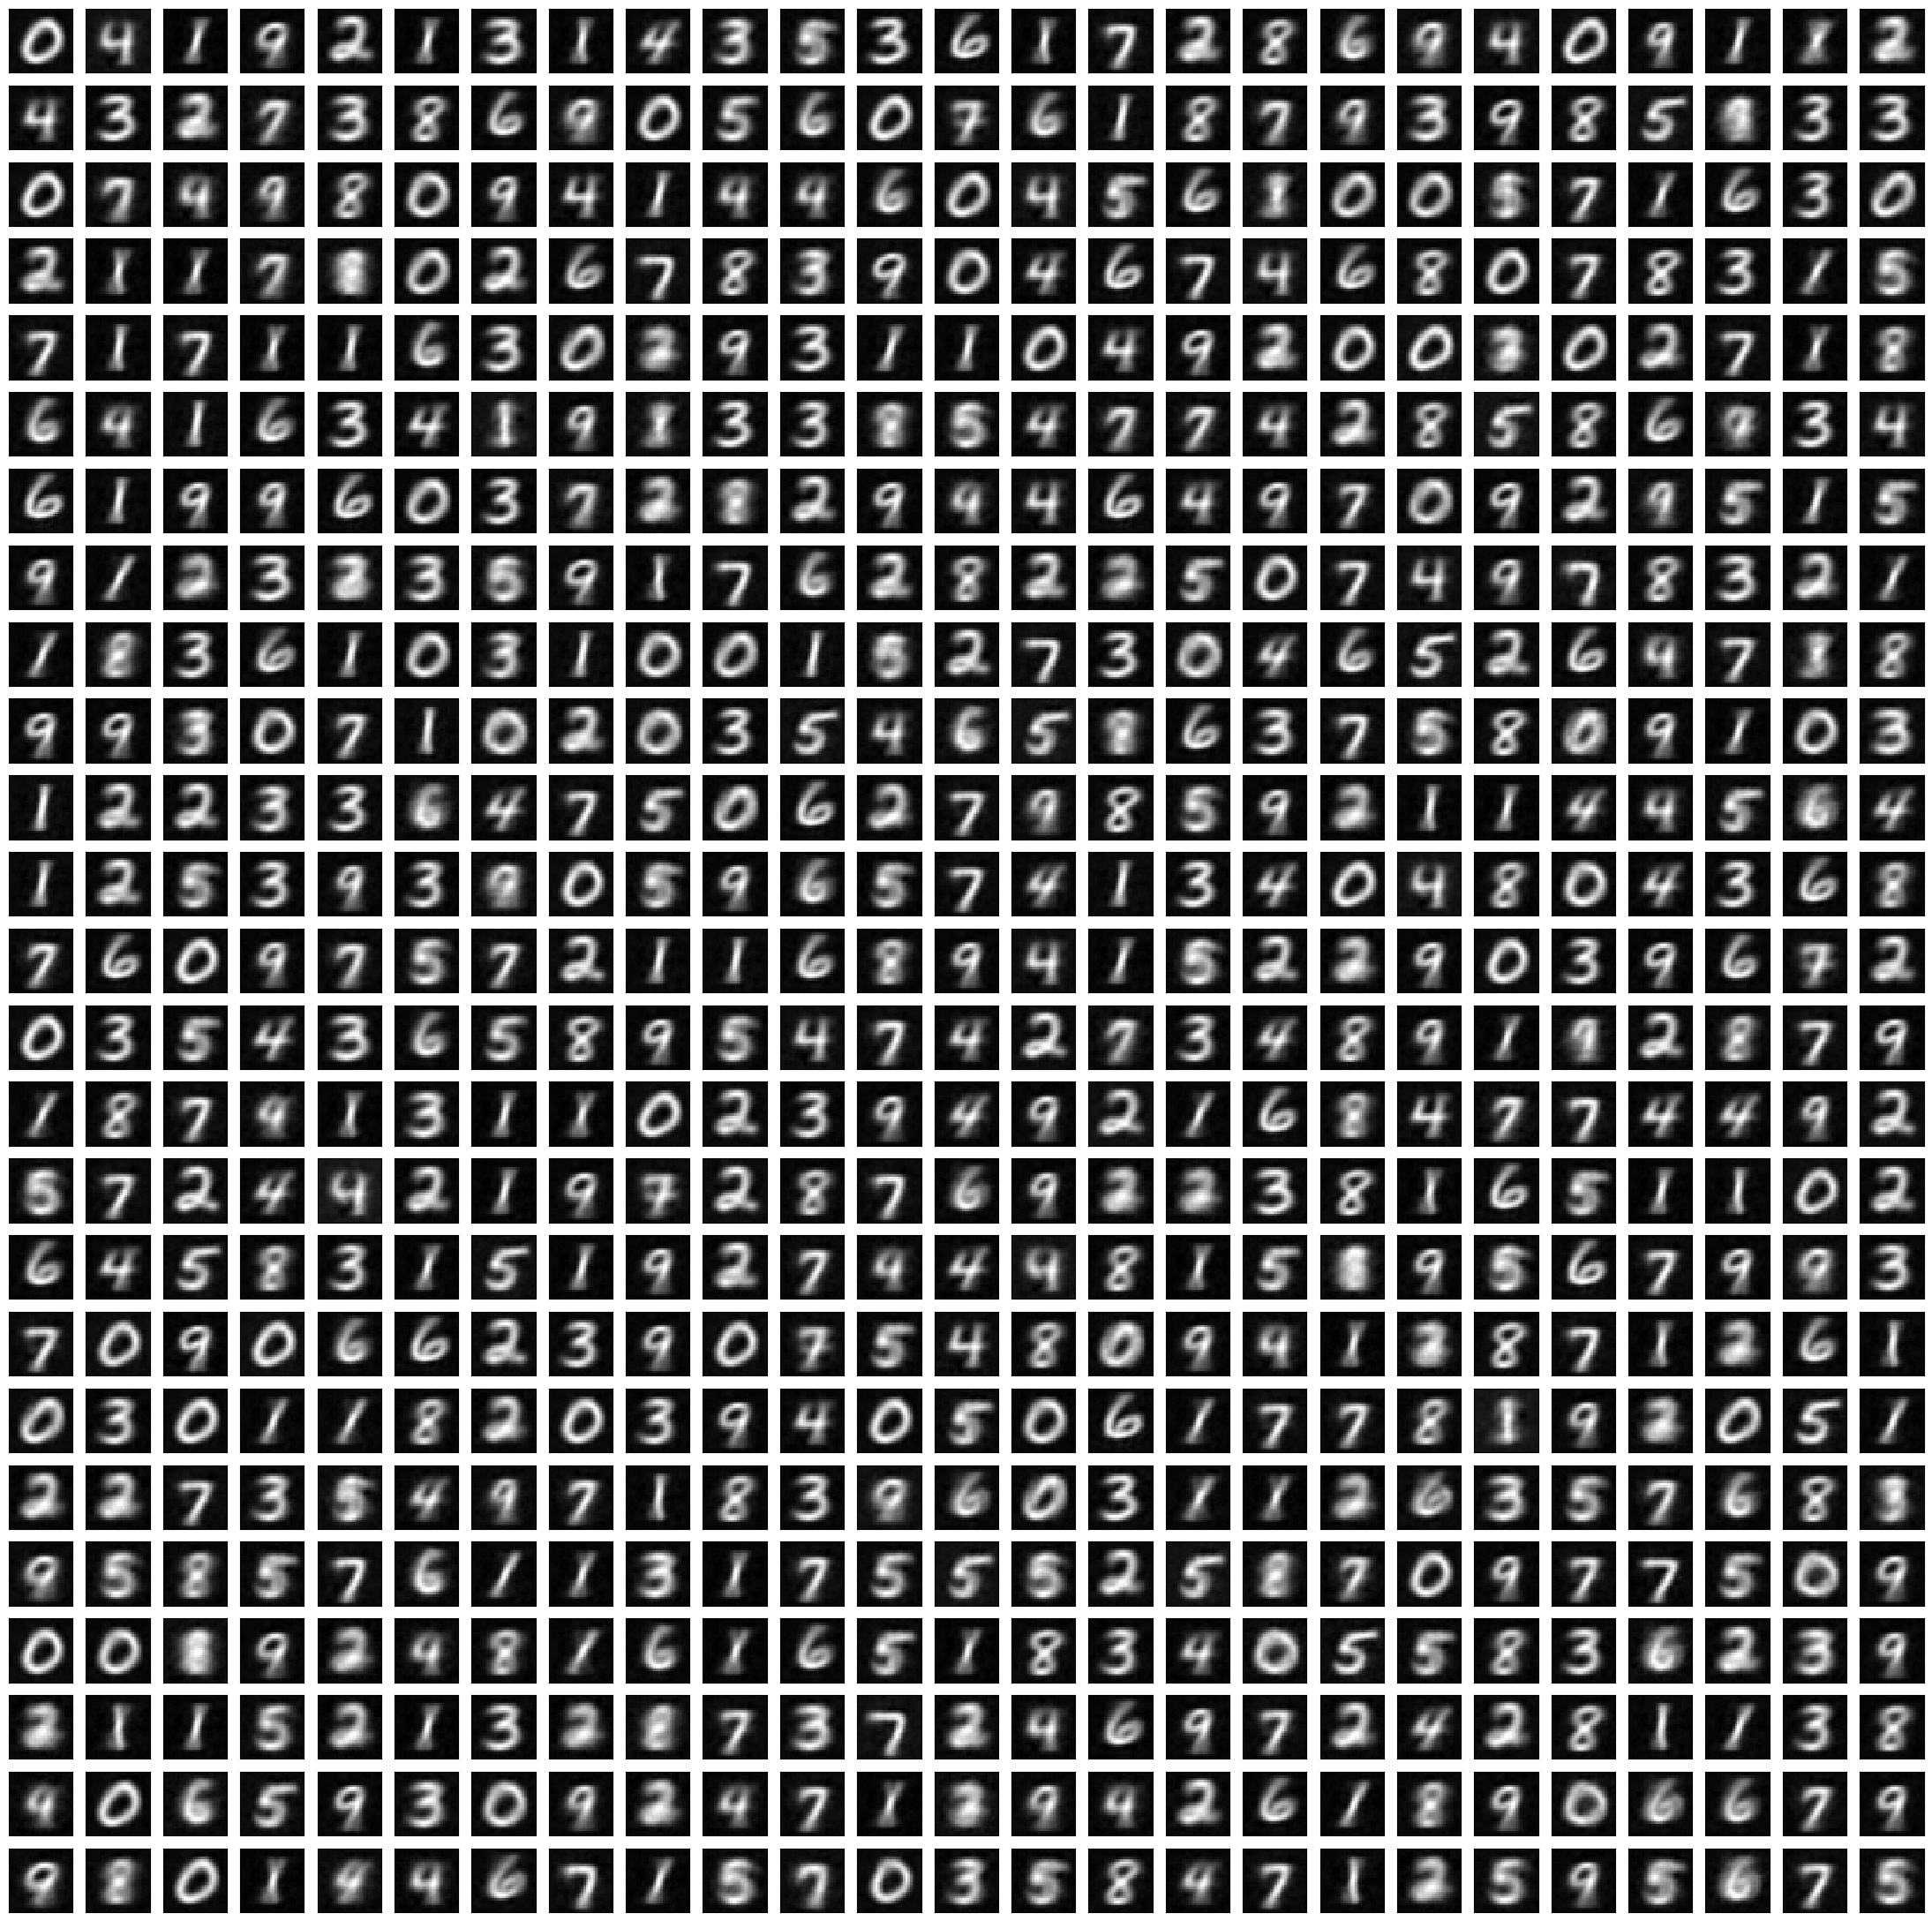

In [82]:
fig = plt.figure(figsize=(28,28))

decoded_images = decoder.predict(x_proj, verbose=False)

ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind)
        plt.imshow(decoded_images[ind].reshape((28,28)), cmap = "gray", interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1

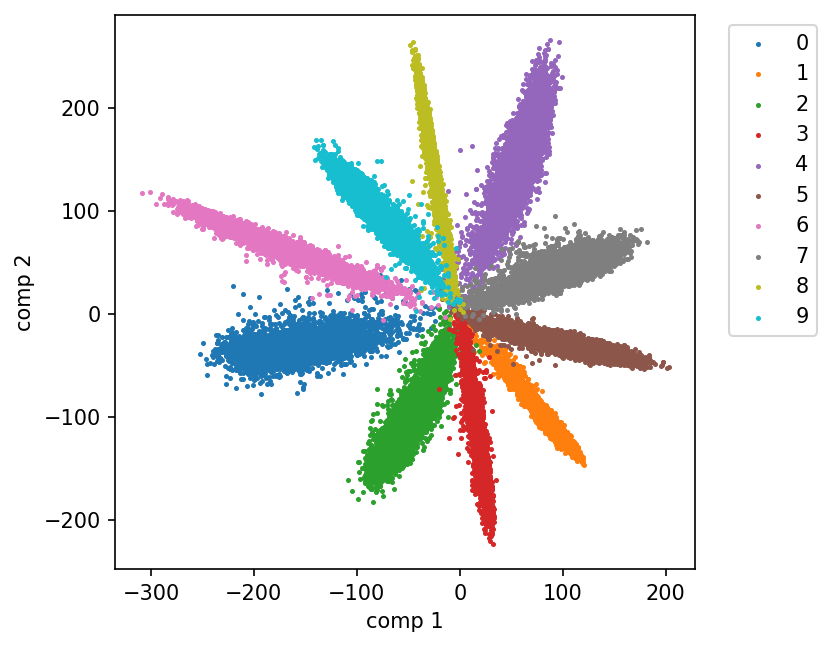

In [83]:
fig, ax = plt.subplots(dpi=150)

for i in range(10):
    ax.scatter(*x_proj[y_train == i].T, label=i, s=2)


ax.legend(bbox_to_anchor=(1.04, 1))
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_aspect('equal', 'box')

plt.show()

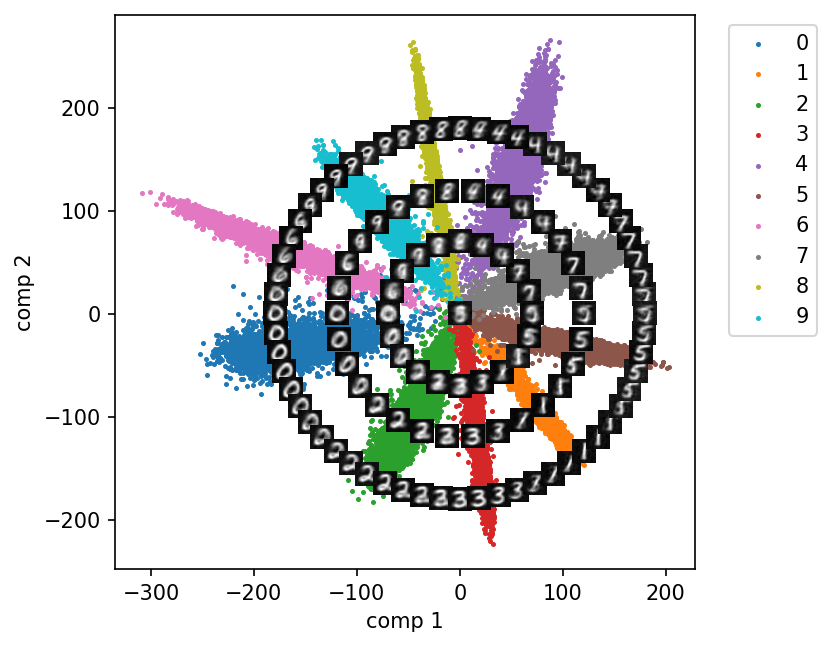

In [84]:
clear_artists(ax)

circle_path(radius=180, center=(0, 0), n_images=60, ax=ax)
circle_path(radius=120, center=(0, 0), n_images=30, ax=ax)
circle_path(radius=70, center=(0, 0), n_images=20, ax=ax)
circle_path(radius=0, center=(0, 0), n_images=1, ax=ax)

fig

<font color="green">
Atividade (c) <br>
Se necessário, redefina os valores de [center], [radius] e [n_images] para que as amostras excursionem por toda a distribuição de códigos. Em outras palavras, não deixe nenhuma região colorida sem amostras.
</font>

<font color="green">
Atividade (d) <br>
Qual foi a estratégia adotada para que o código do autoencoder fizesse o desemaranhamento (disentanglement) das classes? É sempre possível adotar esta estratégia ao se treinar um autoencoder?
</font>

**Resposta:**<br>A estratégia adotada foi treinar o encoder como um classificador sob treinamento supervisionado, forçando-o a aprender uma classificação que separe as classes eficientemente. Assim, esse mapeamento no espaço latente feito pelo encoder treinado como classificador tende a realizar (e de fato realiza, as duas últimas imagens indicam uma separação bem satisfatória das classes) uma separação bem evidente.<br>
Foi possível implementar essa estratégia porque há dados rotulados, logo, em um cenário em que não há rótulos para os dados, não é possível aplicar essa estratégia e, portanto, o autoencoder deverá "aprender" as classes e realizar uma boa separação por conta própria. 